In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
X=np.array([1,2,4,3,5])
y=np.array([1,3,3,2,5])

In [63]:
num = ((X - X.mean()) * (y-y.mean())).sum()
print (num)
den = ((X -X.mean())**2).sum()
print (den)
B1 = num / den
print("B1 is : ", B1)

8.0
10.0
B1 is :  0.8


In [64]:
B0 = y.mean()- B1 * X.mean()
print("B0 is : ", B0)

B0 is :  0.39999999999999947


In [65]:
y_predict = B0 + B1 * X
print (y_predict)

[1.2 2.  3.6 2.8 4.4]


In [66]:
rmse = (np.sqrt(((y-y_predict)**2)/(y.shape[0]))).sum()
print(rmse)

1.4310835055998654


# Lab 2

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [45]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [88]:
#Change C value and compare the performance metric
######decrease C to 0.01#####
lgr001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('\n'"training set score of lgr001: %f" % lgr001.score(X_train, y_train))
print('\n'"test set score of lgr001: %f" % lgr001.score(X_test, y_test))


training set score of lgr001: 0.934272

test set score of lgr001: 0.930070


In [110]:
######default C=1#####
lgr=LogisticRegression().fit(X_train,y_train)
print("training set score: %f" % lgr.score(X_train, y_train))
print('\n'"test set score: %f" % lgr.score(X_test, y_test))

training set score: 0.955399

test set score: 0.958042


In [109]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
p = lgr.predict(X_test)
print(accuracy_score(p, y_test))
print(confusion_matrix(p,y_test))
print((48+89)/(48+1+5+89))


0.958041958041958
[[48  1]
 [ 5 89]]
0.958041958041958


In [90]:
######increase C to 100#####
lgr100=LogisticRegression(C=100).fit(X_train,y_train)
print('\n'"training set score of lgr100: %f" % lgr100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % lgr100.score(X_test, y_test))


training set score of lgr100: 0.971831

test set score of lgr100: 0.965035


In [91]:
######increase C to 1000#####
lgr1000=LogisticRegression(C=1000).fit(X_train,y_train)
print('\n'"training set score of lgr1000: %f" % lgr1000.score(X_train, y_train))
print('\n'"test set score of lgr1000: %f" % lgr1000.score(X_test, y_test))


training set score of lgr1000: 0.983568

test set score of lgr1000: 0.979021


In [92]:
######increase C to 10000#####
lgr10000=LogisticRegression(C=10000).fit(X_train,y_train)
print('\n'"training set score of lgr10000: %f" % lgr10000.score(X_train, y_train))
print('\n'"test set score of lgr10000: %f" % lgr10000.score(X_test, y_test))


training set score of lgr10000: 0.988263

test set score of lgr10000: 0.986014


In [93]:
######increase C to 100000#####
lgr100000=LogisticRegression(C=100000).fit(X_train,y_train)
print('\n'"training set score of lgr100000: %f" % lgr100000.score(X_train, y_train))
print('\n'"test set score of lgr100000: %f" % lgr100000.score(X_test, y_test))


training set score of lgr100000: 0.967136

test set score of lgr100000: 0.965035


In [94]:
print("Co-efficient at c = 1", lgr.coef_, "\n")
print("Co-efficient at c = 100", lgr100.coef_, "\n")
print("Co-efficient at c = 0.01", lgr001.coef_)

Co-efficient at c = 1 [[ 1.90876683e+00  9.98788148e-02 -7.65567571e-02  1.30875965e-03
  -1.36948317e-01 -3.86693503e-01 -5.71948682e-01 -2.83323656e-01
  -2.23813863e-01 -3.50526844e-02  3.04455316e-03  1.25223693e+00
   9.49523571e-02 -9.63789785e-02 -1.32044174e-02 -2.43125981e-02
  -5.86034313e-02 -3.35199227e-02 -4.10795998e-02  1.53205924e-03
   1.24707244e+00 -3.19709151e-01 -9.61881472e-02 -2.66335879e-02
  -2.44041661e-01 -1.24420873e+00 -1.58319440e+00 -5.78354663e-01
  -6.80060645e-01 -1.30760323e-01]] 

Co-efficient at c = 100 [[ 4.80376324  0.1728842  -0.42652667 -0.01386936 -1.83791383 -0.50322538
  -1.83179589 -2.85051078 -2.63265002  0.07780747  0.04577679  2.96533874
  -0.57192061 -0.09479399 -0.23372298  2.21798758  3.07453331 -0.16345079
   0.1890421   0.37127681 -0.11132936 -0.5164732   0.11523547 -0.02078844
  -3.36840247 -1.83352289 -2.60408203 -5.86551523 -5.31948368 -0.08207132]] 

Co-efficient at c = 0.01 [[ 1.13229515e-01  8.86883883e-03  2.49167787e-01  2.69

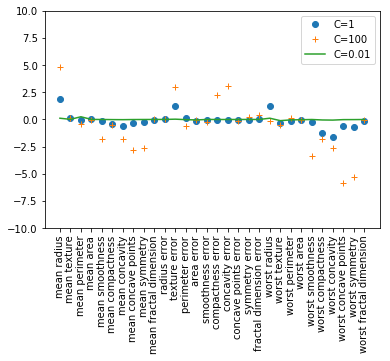

In [95]:
plt.plot(lgr.coef_.T,'o',label='C=1')
plt.plot(lgr100.coef_.T,'+',label='C=100')
plt.plot(lgr001.coef_.T,'-',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-10,10)
plt.legend()
plt.show()

If we desire a more interpretable model, using L1 regularization might help.

As LogisticRegression applies an L2 regularization by default, the result looks similar to Ridge in Figure ridge_coefficients. Stronger regularization pushes coefficients more and more towards zero, though coefficients never become exactly zero.

[-2 -1  0  1  2]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]

Training Accuracy of L1 LogRess with C=0.010000:0.917840

Test Accuracy of L1 LogRegss with C=0.010000: 0.930070

Training Accuracy of L1 LogRess with C=0.100000:0.931925

Test Accuracy of L1 LogRegss with C=0.100000: 0.930070

Training Accuracy of L1 LogRess with C=1.000000:0.960094

Test Accuracy of L1 LogRegss with C=1.000000: 0.958042

Training Accuracy of L1 LogRess with C=10.000000:0.978873

Test Accuracy of L1 LogRegss with C=10.000000: 0.972028

Training Accuracy of L1 LogRess with C=100.000000:0.985915

Test Accuracy of L1 LogRegss with C=100.000000: 0.979021


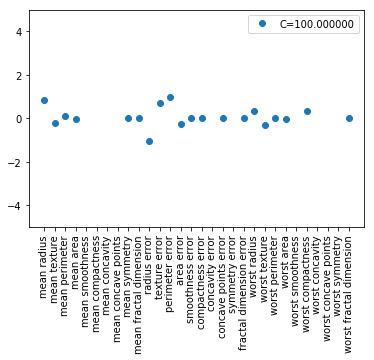

In [96]:
import math
n=np.arange(-2,3)
print(n)
r=pow(float(10),n)
print(r)
for C in r:
    lr_l1=LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print('\n'"Training Accuracy of L1 LogRess with C=%f:%f"%(C,lr_l1.score(X_train,y_train)))
    print('\n'"Test Accuracy of L1 LogRegss with C=%f: %f"%(C,lr_l1.score(X_test,y_test)))
plt.plot(lr_l1.coef_.T,'o',label="C=%f"%C)
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-5,5)
plt.legend(loc='best')
plt.show()